# Librerías

In [50]:
# !pip install plotly
# !pip install umap-learn

In [70]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from umap import UMAP
import umap
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA

# Carga de datos

In [5]:
df = pd.read_csv('Crop_recommendation.csv')

# Análisis de datos

In [6]:
# Analizamos los valores de los atributos
valores = df.head()
print(valores)

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [7]:
# Analizamos la distribución de los atributos
distribucion = df.describe()
print(distribucion)

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [8]:
# Analizamos los tipos de datos
tipos = df.dtypes
print(tipos)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


# Normalización 

In [9]:
# Initialize a scaler
scaler = MinMaxScaler()

# Fit the scaler to the dataframe and transform the dataframe
df_normalized = pd.DataFrame(scaler.fit_transform(df.drop(columns=["label"])), columns=df.drop(columns=["label"]).columns)

# Create a new DataFrame where each row is a variable and each column is an observation
df_melted = df_normalized.melt()


# Outliers

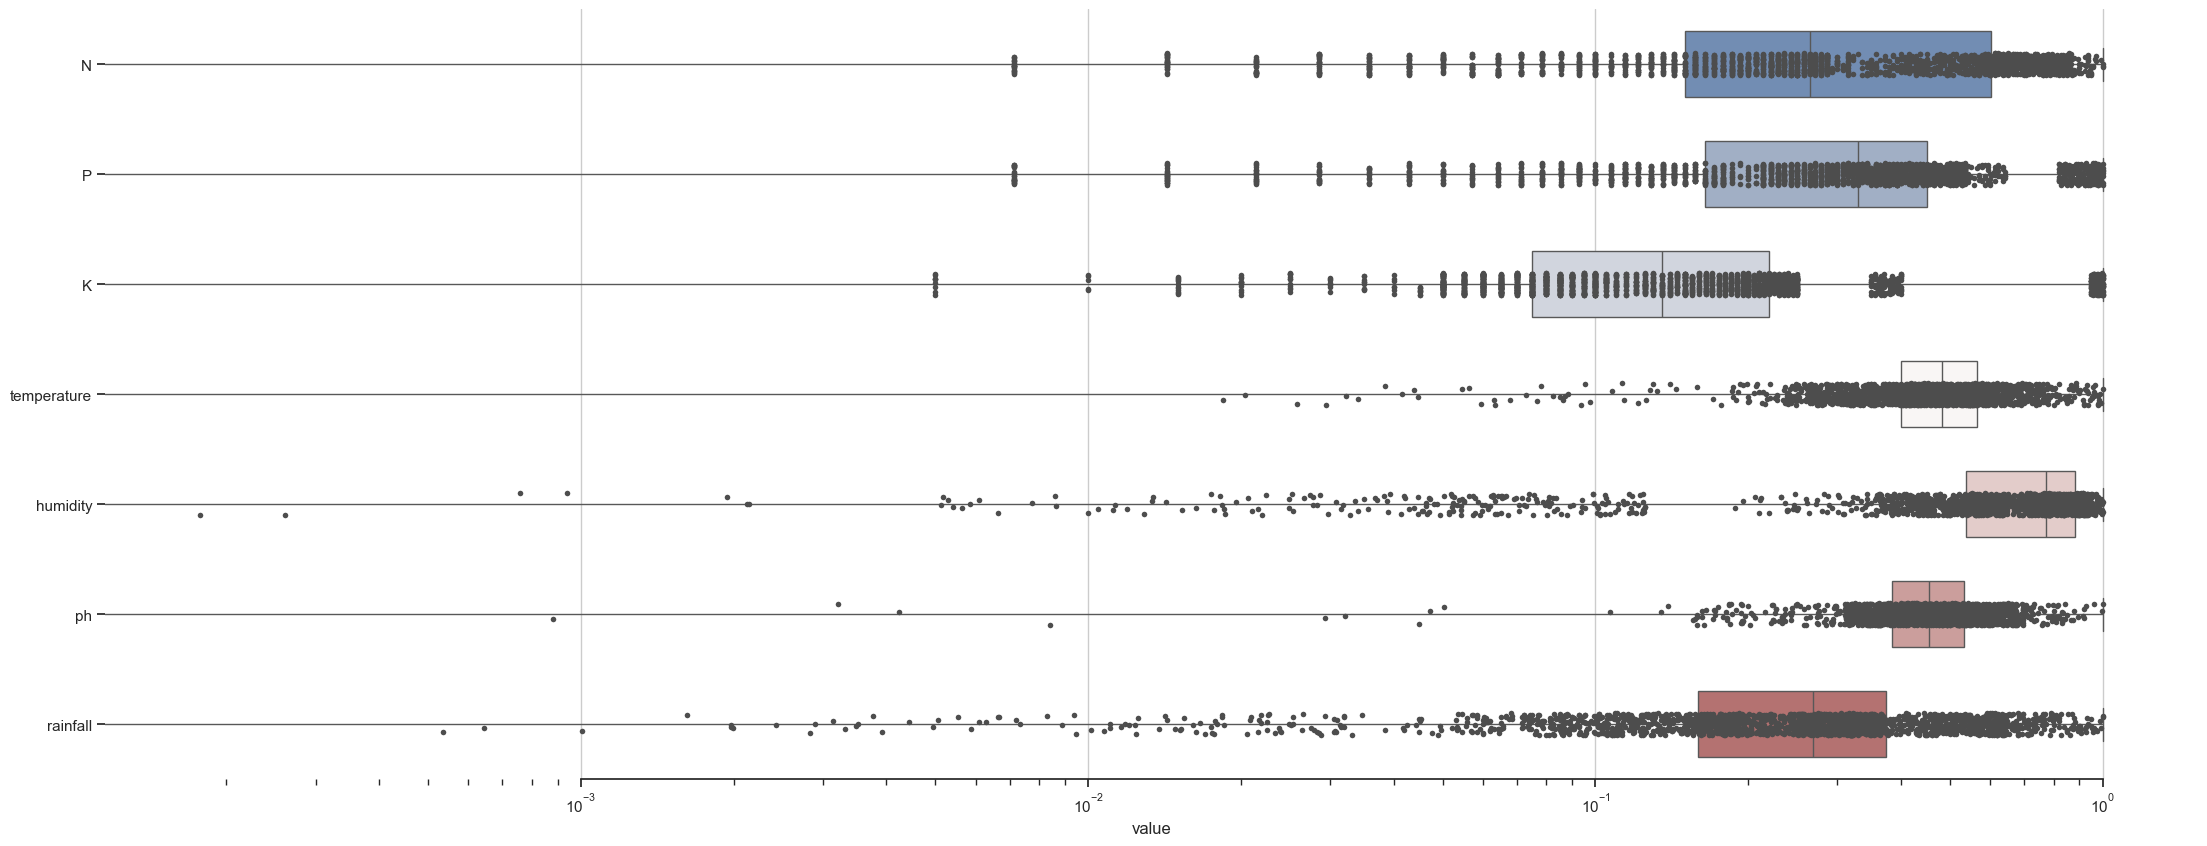

In [10]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(27, 10))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(
    df_melted, x="value", y="variable", hue="variable",
    whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
sns.stripplot(df_melted, x="value", y="variable", size=4, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

# Matriz de correlación

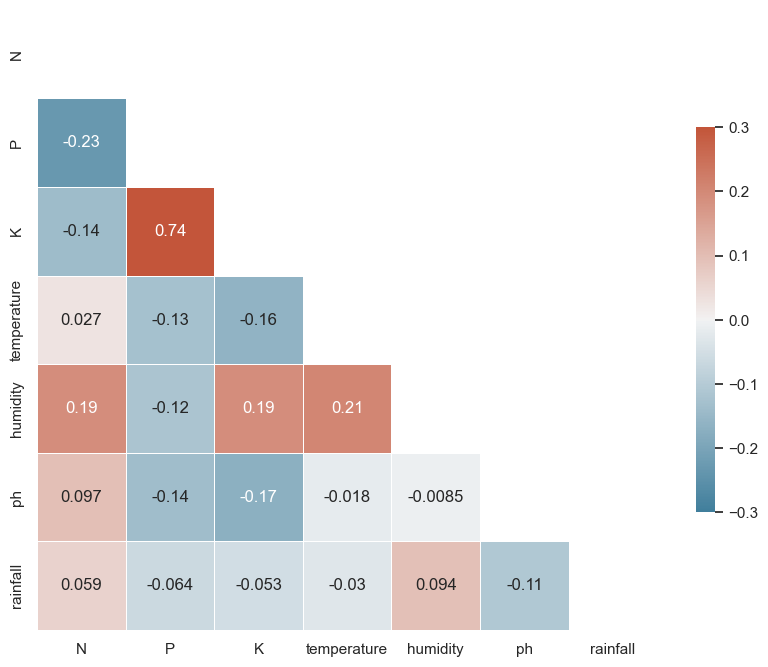

In [11]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_normalized.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-.3 ,vmax=.3,center=0, square=True,annot=True ,linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


# PCA

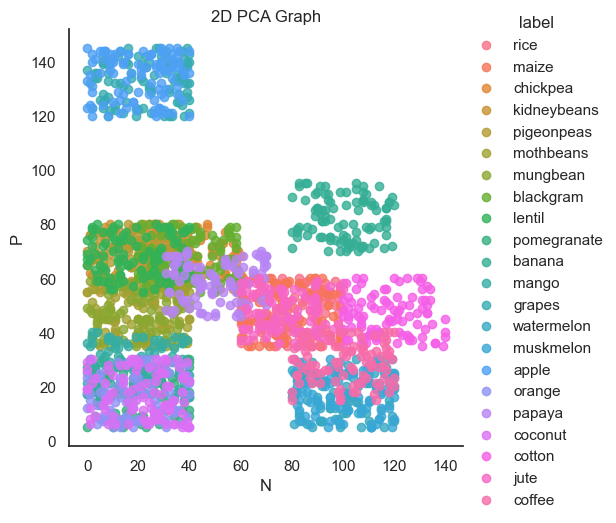

In [51]:
sns.lmplot(x='N', y='P', data=df,
 hue='label', fit_reg=False, legend=True)
plt.title('2D PCA Graph')
plt.show()

In [56]:
from sklearn.decomposition import PCA

In [54]:
df_sub = df.drop(['label'], axis=1)
df_std = (df_sub-df_sub.mean())/df_sub.std()

In [57]:
# Obtener todas las componentes principales
pca = PCA(n_components=df_sub.shape[1], random_state=0)

pca_features = pca.fit_transform(df_std)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pca_df['label'] = df['label']

En la siguiente tabla vemos la proyección de cada comunidad en cada una de las nuevas variables. Surje de multiplicar, por ejemplo, los valores que tenía Madrid en X1, X2,.., hasta X12 por los valores del vector de PC1.

In [58]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label
0,-0.582737,-0.844394,1.373031,-1.613762,0.308154,-0.095975,-0.025234,rice
1,-0.474527,-0.784716,1.251893,-1.792355,1.107493,-0.532134,-0.280479,rice
2,-0.633924,-0.694365,1.179064,-1.817692,2.522690,-0.538428,-0.105943,rice
3,-1.047682,-1.087411,1.393035,-0.982177,1.448452,-0.656779,0.275209,rice
4,-0.873059,-0.658523,1.455354,-2.334481,1.959188,-0.317952,0.052728,rice
...,...,...,...,...,...,...,...,...
2195,-1.260634,-0.618222,0.711136,-1.014740,0.133200,-1.122004,0.306955,coffee
2196,-1.355275,-0.154008,0.701489,-0.197638,-0.898453,-0.771301,0.684801,coffee
2197,-1.158120,-0.640329,1.045602,-1.301545,-0.491653,-0.884927,0.203417,coffee
2198,-1.218911,0.052378,0.180814,-0.990274,-0.601252,-1.308669,0.509541,coffee


### Eigenvectors

Son los valores que conforman los coeficientes de cada una de las nuevas variables.

In [59]:
pd.DataFrame(pca.components_, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,-0.302191,0.643787,0.622607,-0.212428,-0.068483,-0.226943,-0.072532
X2,-0.334107,-0.034358,-0.283829,-0.359487,-0.737917,0.220657,-0.290158
X3,-0.112045,-0.109939,-0.163173,-0.248228,-0.213599,-0.548520,0.735267
X4,-0.541651,-0.046293,-0.154867,0.690826,-0.067171,-0.395700,-0.205318
X5,-0.507785,0.082331,0.033425,0.154865,0.128871,0.651881,0.518382
X6,-0.482904,-0.376847,-0.028967,-0.500418,0.547871,-0.125712,-0.239930
X7,-0.008473,-0.649104,0.692268,0.111282,-0.289624,0.040028,0.038577


### Selección del número de componentes principales

In [60]:
# Creamos función para acumular la varianza
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [61]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_, 'Proporción de variancia explicada':pca.explained_variance_ratio_, 'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,1.931218,0.275888,0.275888
1,1.293910,0.184844,0.460733
2,1.076509,0.153787,0.614520
3,1.022891,0.146127,0.760647
4,0.805928,0.115133,0.875780
5,0.676562,0.096652,0.972431
6,0.192981,0.027569,1.000000


Vemos gráficamente la varianza acumulada:

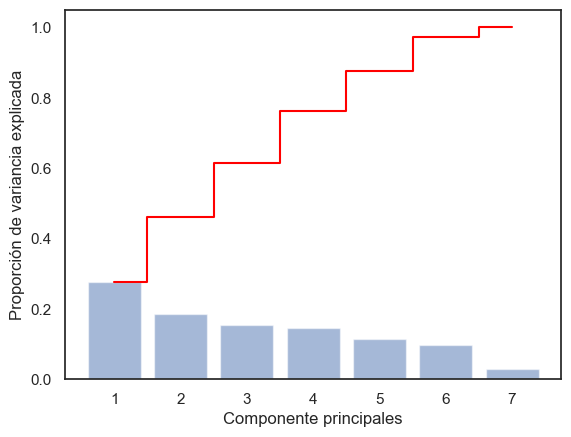

In [63]:
plt.bar(range(1,8), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,8), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

**Criterios de selección:**
* Proporción de variancia acumulada (~75% -80%)​
* Criterio de Kaiser (eigenvalues > 1)​
* Gráfico del codo (Scree)

Las cuatro primeras componentes acumulan el 80% de la variabilidad total, es decir, están cercanas a cumplir con el primer criterio (>~75%). Además, son las únicas cuyos eigenvalues son superiores a 1 (Criterio de Kaiser).

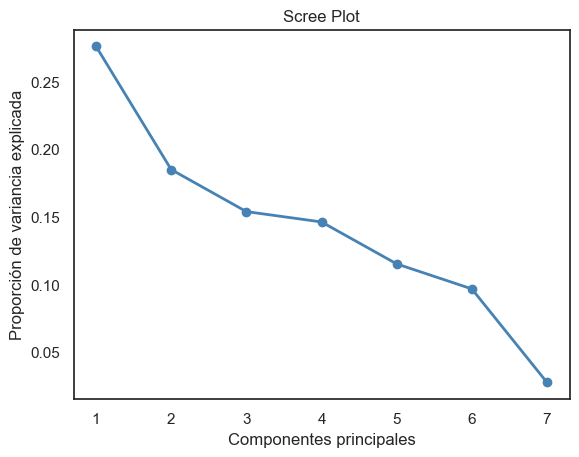

In [64]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.show()

ONONONONONONONNOONOONONOON

### Matriz de correlación de PC seleccionados

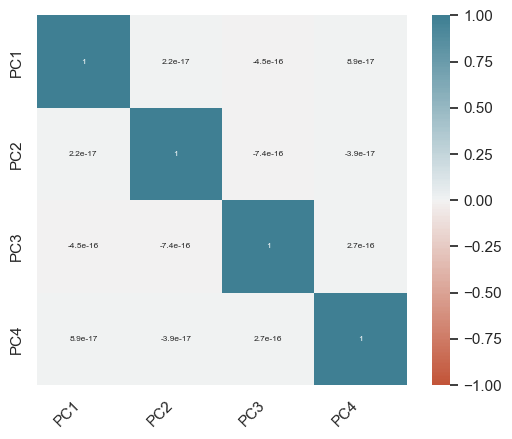

In [65]:
corr = pca_df[['PC1', 'PC2', 'PC3', 'PC4']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

### Scatter plots

In [67]:
df.drop(columns=['label']).columns.to_list()

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [73]:
features = df.drop(columns=['label']).columns.to_list()

In [75]:

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [81]:

fig = px.scatter(pca_features, x=0, y=1, color = pca_df["label"],  labels={'color': 'label'} )
fig.update_layout(title = "Biplot",width = 1200,height = 600)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'label=rice<br>0=%{x}<br>1=%{y}<extra></extra>',
              'legendgroup': 'rice',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'rice',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([-5.82736956e-01, -4.74527029e-01, -6.33924261e-01, -1.04768150e+00,
                          -8.73059074e-01, -8.47089873e-01, -1.52305301e-01, -2.36681074e-01,
                          -6.48845302e-01, -2.28583070e-01, -4.02146325e-01, -1.00068919e+00,
                          -1.03612589e-01, -6.69645009e-01, -8.69039206e-01, -6.02028122e-01,
                          -6.99384646e-01, -1.03567560e+00, -5.43749263e-01, -7.84287870e-01,
                          -5.75273328e-01, -3.07454692e-01,  1.13482143e-03, -5.21099558e-01,
                          -1.01529557e+00, -8.13152206e-01, -5.71217811e-01, -8.99307063e-01,
                          -1.64896154e-01, -3.70446780e-01, -1.00758447e-01, -7.75531811e-01,
                          -8.31840569e-01, -1.20801128e-01, -4.65524025e-01, -4.56234657e-01,
                          -6.38466418e-01, -7.29497011e-01, -7.07928454e-01, -2.92477848e-01,
                          -5.58584931e-01, -2.40634094e-01, -5.67175241e-01, -7.83920955e-01,
                          -8.45250602e-01, -8.19474896e-01, -1.34451025e-01, -1.09360911e+00,
                          -7.25914782e-01, -8.67655693e-01, -2.30165873e-01, -2.10556751e-01,
                          -7.19572832e-01,  1.43194953e-01, -5.73500849e-01, -7.25949338e-01,
                          -6.83958900e-01, -7.58203823e-01, -5.61896859e-01, -6.29653476e-01,
                          -8.92198358e-01, -2.70119988e-01, -5.77858761e-01, -7.14068893e-01,
                          -2.09552672e-01, -9.56595892e-01, -2.29966020e-01, -7.06396844e-01,
                          -1.10176741e-01, -5.41040668e-01, -4.65590571e-01, -7.85742213e-01,
                          -8.83761085e-01, -7.13920272e-01, -7.71612237e-01, -1.01574836e+00,
                          -1.03202060e+00, -3.48205369e-01, -7.98812572e-01, -9.67562613e-01,
                          -6.35641934e-02, -4.40663417e-01, -3.41459866e-01, -4.81023471e-01,
                          -2.65459843e-02, -1.51318140e-01, -3.00612538e-01, -3.63376972e-01,
                          -7.30193602e-02, -5.00026030e-01, -9.89433216e-01, -1.06991239e+00,
                          -7.00095375e-01, -1.19173808e+00, -2.58429699e-01, -5.99209263e-01,
                          -7.33260525e-01, -3.05035135e-02, -9.96206120e-01, -2.59320668e-01]),
              'xaxis': 'x',
              'y': array([-0.84439365, -0.78471612, -0.69436459, -1.08741055, -0.65852324,
                          -0.93489713, -1.38059248, -1.29178203, -1.22200532, -0.9785275 ,
                          -1.87367905, -1.00853195, -1.96924648, -0.84079883, -1.05893623,
                          -0.73669714, -1.32163515, -0.86226382, -0.96398776, -1.69794943,
                          -0.70539563, -1.61493482, -0.87927266, -1.04493814, -0.91379884,
                          -0.79797893, -1.80508092, -1.25637079, -0.93081029, -0.915437  ,
                          -1.39175383, -0.90172944, -1.20920397, -1.62546556, -1.51165441,
                          -1.42921163, -1.80747857, -1.80024887, -0.86456638, -1.42972871,
                          -0.95141702, -1.31278712, -0.90846557, -1.62661813, -1.34345094,
                          -1.05785117, -1.42916093, -0.71619981, -0.6184394 , -0.98318184,
                          -1.21942717, -0.55468975, -0.80706326, -1.08083406, -2.0162    ,
                          -1.46651078, -0.97201292, -1.62723055, -0.35406465, -1.292499  ,
                          -0.53741362, -1.60980113, -1.18213645, -0.54828165, -1.2417359 ,
                          -0.98956121, -1.10459121, -1.22079442, -1.52919728, -1.3592931 ,
                      

In [78]:
pip install nbformat


   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/85.5 kB ? eta -:--:--
   ---------------------------------------- 85.5/85.5 kB ? eta 0:00:00
   ---------------------------------------- 0.0/206.7 kB ? eta -:--:--
   --------------------------------------- 206.7/206.7 kB 12.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [79]:
pip install --upgrade nbformat


Note: you may need to restart the kernel to use updated packages.


In [72]:

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig = px.scatter(pca_features, x=0, y=1, color = pca_df["label"],  labels={'color': 'label'} )
fig.update_layout(title = "Biplot",width = 1200,height = 600)
fig.show()
fig = px.scatter_3d(pca_features, x=0, y=1, z=2,
              color=pca_df["label"],  labels={'color': 'label'})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Unmap

In [13]:
X = df_normalized.copy()

In [27]:
Y = df.copy()
Y = Y.drop(columns=["N","P","K","temperature","humidity","ph","rainfall"])

In [24]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231
...,...,...,...,...,...,...,...
2195,0.764286,0.207143,0.135,0.515037,0.608410,0.509353,0.566064
2196,0.707143,0.071429,0.110,0.533473,0.494359,0.401561,0.386972
2197,0.842857,0.200000,0.125,0.439202,0.617880,0.444433,0.550071
2198,0.835714,0.192857,0.145,0.500627,0.441760,0.506045,0.384280


In [28]:
Y

,label
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [32]:
umap_2d = UMAP(n_components=2, init='random', random_state=0)
proj_2d = umap_2d.fit_transform(X)

c:\Users\src4\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [33]:
proj_2d

array([[-2.0270789 ,  7.582652  ],
       [-2.0989208 ,  7.1073866 ],
       [-2.3034317 ,  6.6974998 ],
       ...,
       [ 1.0795722 , -4.2186174 ],
       [ 0.66044176, -4.7489495 ],
       [ 0.93085325, -4.691098  ]], dtype=float32)

In [37]:
umapProj2D = pd.DataFrame(proj_2d, columns=['Comp1', 'Comp2'])
umapProj2D['category'] = Y['label']
umapProj2D.head(10)

,Comp1,Comp2,category
0,-2.027079,7.582652,rice
1,-2.098921,7.107387,rice
2,-2.303432,6.697500,rice
3,-2.254814,6.747669,rice
4,-2.269185,6.699446,rice
5,-2.238574,6.715657,rice
6,-2.726557,7.341672,rice
7,-2.564851,7.382063,rice
8,-2.199633,7.087467,rice
9,-2.251377,7.351481,rice


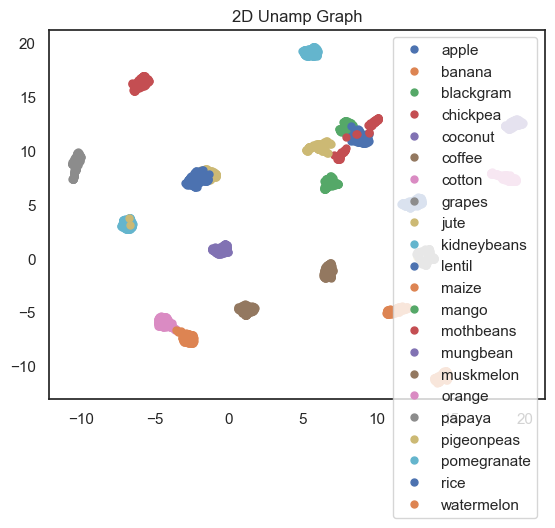

In [39]:
groups = umapProj2D.groupby('category')
plt.title('2D Unamp Graph')
for name, group in groups:
    plt.plot(group['Comp1'], group['Comp2'], marker='o',  linestyle='', markersize=5, label=name)
plt.legend()


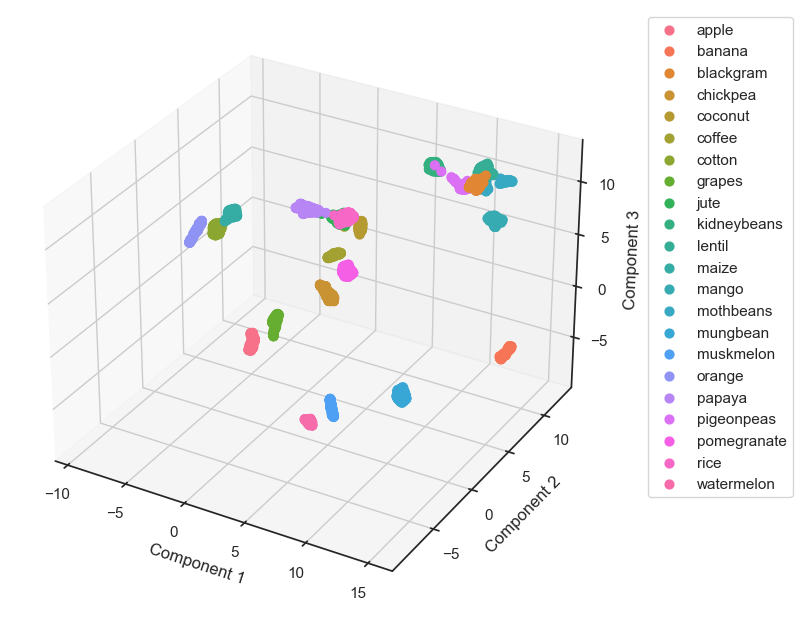

In [48]:
proj_3d = umap_3d.fit_transform(X)
umapProj3D = pd.DataFrame(proj_3d, columns=['Component 1','Component 2', 'Component 3'])
umapProj3D['category'] = Y['label']

fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

labels = np.unique(umapProj3D['category'])
palette = sns.color_palette("husl", len(labels))

for label, color in zip(labels, palette):
    df1 = umapProj3D[umapProj3D['category'] == label]
    ax.scatter(df1['Component 1'], df1['Component 2'], 
        df1['Component 3'], s=40, marker='o',
        color=color, alpha=1, label=label)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()